In [2]:

# Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


In [3]:
data=pd.read_csv(r"C:\Users\sharo\Desktop\AI\AI Library\SupervisedLearning\9_Logistic_Regression_multiclass\breast_cancer_data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.drop(["id",'Unnamed: 32'],axis=1,inplace=True)

In [7]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
# using map function

data["diagnosis"]=data["diagnosis"].map({"B":0,"M":1})

In [10]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [11]:
data["diagnosis"].value_counts() # inbalance data aan

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
X = data.drop("diagnosis",axis=1)
y=data["diagnosis"]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

c:\Users\sharo\anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
classifier.score(X_train,y_train)

0.9396984924623115

In [16]:
classifier.score(X_test,y_test)

0.9707602339181286

In [17]:
y_pred=classifier.predict(X_test)

In [18]:
y_test.value_counts()

0    108
1     63
Name: diagnosis, dtype: int64

In [19]:
# applying desision tree

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train,y_train)

sc=dt_classifier.score(X_train,y_train)
print("R-squared Train",sc)

ss=dt_classifier.score(X_test,y_test)
print("R-squared Test",ss)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
print("RMSE :",mse**(1/2.0))

R-squared Train 1.0
R-squared Test 0.9239766081871345
MSE: 0.07602339181286549
RMSE : 0.2757233972895037


In [20]:
from sklearn import tree

# ini angod Random forest inte class aan

In [21]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

sc=clf.score(X_train,y_train)
print(f"Train accuarcy for {clf.__class__.__name__} is {sc}")

sc=clf.score(X_test,y_test)
print(f"Test accuarcy for {clf.__class__.__name__} is {sc}")

    
    
print("************************")

Train accuarcy for LogisticRegression is 0.9396984924623115
Test accuarcy for LogisticRegression is 0.9707602339181286
************************


c:\Users\sharo\anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Randomforest

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

sc=clf.score(X_train,y_train)
print(f"Train accuarcy for {clf.__class__.__name__} is {sc}")

sc=clf.score(X_test,y_test)
print(f"Test accuarcy for {clf.__class__.__name__} is {sc}")

    
    
print("************************")

Train accuarcy for RandomForestClassifier is 1.0
Test accuarcy for RandomForestClassifier is 0.9824561403508771
************************


In [23]:
clf.feature_importances_

array([0.04145342, 0.01484217, 0.05196738, 0.07909307, 0.00343266,
       0.00616629, 0.08064524, 0.12376753, 0.00437174, 0.00552756,
       0.0116915 , 0.0032509 , 0.00869089, 0.03151558, 0.00524534,
       0.0046809 , 0.00438571, 0.00838186, 0.00327086, 0.00758532,
       0.08039903, 0.01525586, 0.12645913, 0.08028574, 0.01325228,
       0.01079783, 0.04836766, 0.10829056, 0.01089861, 0.00602737])

In [24]:
feature=pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)

In [25]:
feature

perimeter_worst            0.126459
concave points_mean        0.123768
concave points_worst       0.108291
concavity_mean             0.080645
radius_worst               0.080399
area_worst                 0.080286
area_mean                  0.079093
perimeter_mean             0.051967
concavity_worst            0.048368
radius_mean                0.041453
area_se                    0.031516
texture_worst              0.015256
texture_mean               0.014842
smoothness_worst           0.013252
radius_se                  0.011692
symmetry_worst             0.010899
compactness_worst          0.010798
perimeter_se               0.008691
concave points_se          0.008382
fractal_dimension_se       0.007585
compactness_mean           0.006166
fractal_dimension_worst    0.006027
fractal_dimension_mean     0.005528
smoothness_se              0.005245
compactness_se             0.004681
concavity_se               0.004386
symmetry_mean              0.004372
smoothness_mean            0

In [26]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.1.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\sharo\anaconda2\lib\site-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: scikit-learn-intelex, imbalanced-learn


<AxesSubplot:>

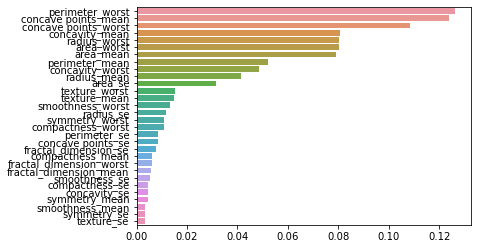

In [27]:
import seaborn as sns

sns.barplot(x=feature,y=feature.index)

In [28]:
# high information gain aan "concave point mean" athan high feature importance kodukkan karyam

# adda boost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
clf=AdaBoostClassifier()

clf.fit(X_train,y_train)

sc=clf.score(X_train,y_train)
print(f"Train accuarcy for {clf.__class__.__name__} is {sc}")

sc=clf.score(X_test,y_test)
print(f"Test accuarcy for {clf.__class__.__name__} is {sc}")

    
    
print("************************")

Train accuarcy for AdaBoostClassifier is 1.0
Test accuarcy for AdaBoostClassifier is 0.9766081871345029
************************


# gradiant boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(X_train,y_train)

sc=clf.score(X_train,y_train)
print(f"Train accuarcy for {clf.__class__.__name__} is {sc}")

sc=clf.score(X_test,y_test)
print(f"Test accuarcy for {clf.__class__.__name__} is {sc}")

    
    
print("************************")

Train accuarcy for GradientBoostingClassifier is 1.0
Test accuarcy for GradientBoostingClassifier is 0.9590643274853801
************************


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=600,learning_rate=1,max_features=5,random_state=100)

clf.fit(X_train,y_train)

sc=clf.score(X_train,y_train)
print(f"Train accuarcy for {clf.__class__.__name__} is {sc}")

sc=clf.score(X_test,y_test)
print(f"Test accuarcy for {clf.__class__.__name__} is {sc}")

    
    
print("************************")

Train accuarcy for GradientBoostingClassifier is 1.0
Test accuarcy for GradientBoostingClassifier is 0.9824561403508771
************************
